# Проект: Исследование стартапов
- Автор: Ивегеш Ольга
- Дата: 24.04.2025

## Введение

### Цели и задачи проекта

- Подготовить датасет 
- Проверить, что данные в нём соответствуют здравому смыслу
- Ответить на вопросы заказчика как о предобработке, так и о значении данных для бизнеса.

### Описание данных
#### Таблица acquisition (Содержит информацию о покупках одними компаниями других компаний):
- id — идентификатор покупки.
- acquiring_company_id — идентификатор покупающей компании.
- acquired_company_id — идентификатор покупаемой компании.
- term_code — варианты расчёта.
- price_amount — сумма сделки.
- acquired_at — дата сделки.
#### Таблица company_and_rounds (Содержит информацию о компаниях и раундах финансирования):
- company ID — идентификатор компании.
- name — название компании.
- category code — категория области деятельности компании.
- status — статус компании.
- founded at — дата инвестирования.
- closed at — дата закрытия компании.
- domain — официальный сайт компании.
- network username — ник компании в сети.
- country code — код страны компании.
- investment rounds — число инвестиционных раундов.
- funding rounds — число раундов финансирования.
- funding total — сумма финансирования.
- milestones — вехи финансирования.
- funding round id — идентификатор этапа финансирования.
- company id — идентификатор компании.
- funded at — дата финансирования.
- funding round type — тип финансирования.
- raised amount — сумма финансирования.
- pre money valuation — предварительная денежная оценка.
- participants — число участников.
- is first round — является ли раунд первым.
- is last round — является раунд последним.
#### Таблица education (Содержит информацию об образовании сотрудника):
- id — идентификатор записи об образовании.
- person_id — идентификатор работника.
- instituition — название учебного заведения.
- graduated_at — дата получения образования.
#### Таблица people (Содержит информацию о сотрудниках):
- id — идентификатор сотрудника.
- first_name — имя сотрудника.
- last_name — фамилия сотрудника.
- company_id — идентификатор компании.
- network_username — ник в социальных сетях.
####  Таблица degrees (Содержит информацию о типе образования сотрудника):
- id — идентификатор записи.
- object_id — идентификатор сотрудника.
- degree_type — тип образования.
- subject — специальность.


## Шаг 1. Знакомство с данными: загрузка и первичная предобработка

Названия файлов:
* acquisition.csv
* company_and_rounds.csv
* people.csv
* education.csv
* degrees.csv

Опциональные датасеты:
* fund.csv
* investment.csv


Они находятся в папке datasets, если вы выполняете работу на платформе. В случае, если вы делаете работу локально, доступ к файлам в папке можно получить по адресу `https://code.s3.yandex.net/datasets/` + имя файла.

### Вывод общей информации, исправление названия столбцов

- Загрузите все данные по проекту.
- Проверьте названия столбцов.
- Выведите информацию, которая необходима вам для принятия решений о предобработке, для каждого из датасетов.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install matplotlib-venn -q
from matplotlib_venn import venn2, venn3 

In [3]:
path = 'https://code.s3.yandex.net/datasets/'
acquisition=pd.read_csv(path + 'acquisition.csv')
company_and_rounds=pd.read_csv(path + 'company_and_rounds.csv')
people=pd.read_csv(path + 'people.csv')
education=pd.read_csv(path + 'education.csv')
degrees=pd.read_csv(path + 'degrees.csv')
fund=pd.read_csv(path + 'fund.csv')

In [5]:
acquisition.head()

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01


In [7]:
acquisition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB


In [9]:
company_and_rounds.head()

,company ID,name,category code,status,founded at,closed at,domain,network username,country code,investment rounds,...,milestones,funding round id,company id,funded at,funding round type,raised amount,pre money valuation,participants,is first round,is last round
0,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
company_and_rounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   company  ID            217472 non-null  float64
 1   name                   217471 non-null  object 
 2   category  code         143886 non-null  object 
 3   status                 217472 non-null  object 
 4   founded  at            109956 non-null  object 
 5   closed  at             3449 non-null    object 
 6   domain                 147159 non-null  object 
 7   network  username      95534 non-null   object 
 8   country  code          108607 non-null  object 
 9   investment  rounds     217472 non-null  float64
 10  funding  rounds        217472 non-null  float64
 11  funding  total         217472 non-null  float64
 12  milestones             217472 non-null  float64
 13  funding  round  id     52928 non-null   float64
 14  company  id            52928 non-nul

In [13]:
people.head()

,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN
3,10000,Neil,Capel,2526.0,NaN
4,100000,Sue,Pilsch,NaN,NaN


In [15]:
people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226700 non-null  object 
 2   last_name         226705 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


In [17]:
education.head()

,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaN
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaN


In [19]:
education.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   instituition  109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


In [21]:
degrees.head()

,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"


In [23]:
degrees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98389 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


###### Вывод
На данном этапе загружены все необходимые файлы. Изучено содержимое таблиц, типы данных и названия. 
- В таблице acquisition 9407 строк и 6 столбцов. Необходимо поработать с типами данных и пропусками.
- В таблице company_and_rounds 217774 строк и 22 столбца. Необходимо привести названия столбцов к змеиному виду, поработать с типами данных и пропусками. Также в таблице дважды встречается столбец company_id
- В таблице people 226709 строк и 5 столбцов. Необходимо обработать пропуски, изменить типы данных.
- В таблице education 109610 строк и 4 столбца. Необходимо обработать пропуски, изменить типы данных.
- В таблице degrees 109610 строк и 4 столбца. Необходимо обработать пропуски, изменить типы данных.

In [25]:
education=education.rename(columns={'instituition':'institution'})
education.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   institution   109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


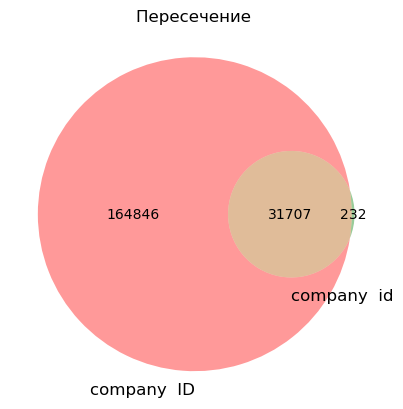

In [27]:
first_id = set(company_and_rounds['company  ID'].dropna().unique())
second_id = set(company_and_rounds['company  id'].dropna().unique())
# Строим диаграмму Венна
venn2([first_id, second_id], set_labels=('company  ID', 'company  id'))

# Отображаем график
plt.title("Пересечение ")
plt.show() 

### Смена типов и анализ пропусков

- Обработайте типы данных в столбцах, которые хранят значения даты и времени, если это необходимо.
- Оцените полноту данных — сделайте предварительный вывод, достаточно ли данных для решения задач проекта.

In [29]:
print(f'Названия столбцов до изменения: \n {company_and_rounds.columns}')
company_and_rounds.columns=company_and_rounds.columns.str.replace('  ', '_')
print(f'Названия столбцов после изменения: \n {company_and_rounds.columns}')

Названия столбцов до изменения: 
 Index(['company  ID', 'name', 'category  code', 'status', 'founded  at',
       'closed  at', 'domain', 'network  username', 'country  code',
       'investment  rounds', 'funding  rounds', 'funding  total', 'milestones',
       'funding  round  id', 'company  id', 'funded  at',
       'funding  round  type', 'raised  amount', 'pre  money  valuation',
       'participants', 'is  first  round', 'is  last  round'],
      dtype='object')
Названия столбцов после изменения: 
 Index(['company_ID', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones',
       'funding_round_id', 'company_id', 'funded_at', 'funding_round_type',
       'raised_amount', 'pre_money_valuation', 'participants',
       'is_first_round', 'is_last_round'],
      dtype='object')


In [31]:
# изменение типов данных таблицы acquisition 
acquisition['acquired_at']=pd.to_datetime(acquisition['acquired_at'])
acquisition['term_code']=acquisition['term_code'].astype('category')
acquisition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    9407 non-null   int64         
 1   acquiring_company_id  9407 non-null   int64         
 2   acquired_company_id   9407 non-null   int64         
 3   term_code             1831 non-null   category      
 4   price_amount          9407 non-null   int64         
 5   acquired_at           9378 non-null   datetime64[ns]
dtypes: category(1), datetime64[ns](1), int64(4)
memory usage: 376.9 KB


In [33]:
# изменение типов данных таблицы company_and_rounds
company_and_rounds[['founded_at', 'closed_at', 'funded_at']]=company_and_rounds[['founded_at', 'closed_at', 'funded_at']].apply(pd.to_datetime)
company_and_rounds[['status','category_code']]=company_and_rounds[['status','category_code']].astype('category')
company_and_rounds[['is_first_round', 'is_last_round']]=company_and_rounds[['is_first_round', 'is_last_round']].astype('boolean')
company_and_rounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_ID           217472 non-null  float64       
 1   name                 217471 non-null  object        
 2   category_code        143886 non-null  category      
 3   status               217472 non-null  category      
 4   founded_at           109956 non-null  datetime64[ns]
 5   closed_at            3449 non-null    datetime64[ns]
 6   domain               147159 non-null  object        
 7   network_username     95534 non-null   object        
 8   country_code         108607 non-null  object        
 9   investment_rounds    217472 non-null  float64       
 10  funding_rounds       217472 non-null  float64       
 11  funding_total        217472 non-null  float64       
 12  milestones           217472 non-null  float64       
 13  funding_round_

In [35]:
# изменение типов данных таблицы education
education['graduated_at']=pd.to_datetime(education['graduated_at'])
education.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            109610 non-null  int64         
 1   person_id     109610 non-null  int64         
 2   institution   109555 non-null  object        
 3   graduated_at  58054 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 3.3+ MB


In [37]:
# изменение типов данных таблицы degrees
degrees['degree_type']=degrees['degree_type'].astype('category')
degrees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   id           109610 non-null  int64   
 1   object_id    109610 non-null  object  
 2   degree_type  98389 non-null   category
 3   subject      81298 non-null   object  
dtypes: category(1), int64(1), object(2)
memory usage: 3.0+ MB


## Шаг 2. Предобработка данных, предварительное исследование


### Раунды финансирования по годам

Задание необходимо выполнить без объединения и дополнительной предобработки на основе датасета `company_and_rounds.csv`.

- Составьте сводную таблицу по годам, в которой на основании столбца `raised_amount` для каждого года указан:
    - типичный размер средств, выделяемый в рамках одного раунда;
    - общее количество раундов финансирования за этот год.
    
- Оставьте в таблице информацию только для тех лет, для которых есть информация о более чем 50 раундах финансирования.
- На основе получившейся таблицы постройте график, который будет отражать динамику типичного размера средств, которые стартапы получали в рамках одного раунда финансирования.

На основе полученных данных ответьте на вопросы:

- В каком году типичный размер собранных в рамках одного раунда средств был максимален?
- Какая тенденция по количеству раундов и выделяемых в рамках каждого раунда средств наблюдалась в 2013 году?

In [39]:
company_and_rounds['funded_at_year']=company_and_rounds['funded_at'].dt.year
pivot = company_and_rounds.pivot_table(values=['funding_rounds','raised_amount'], index='funded_at_year', aggfunc={'funding_rounds':'count','raised_amount':'median'})
print(pivot.loc[pivot['funding_rounds']>50])

                funding_rounds  raised_amount
funded_at_year                               
1999.0                      76      2000000.0
2000.0                     125      4200000.0
2001.0                      95      3000000.0
2002.0                     115      4200000.0
2003.0                     154      3000000.0
2004.0                     286      5000000.0
2005.0                    1624      5500000.0
2006.0                    2409      5000000.0
2007.0                    3220      3973320.0
2008.0                    3735      3110000.0
2009.0                    4112      2000000.0
2010.0                    6194      1602500.0
2011.0                    9162      1200000.0
2012.0                    9956      1000000.0
2013.0                   11042      1200000.0


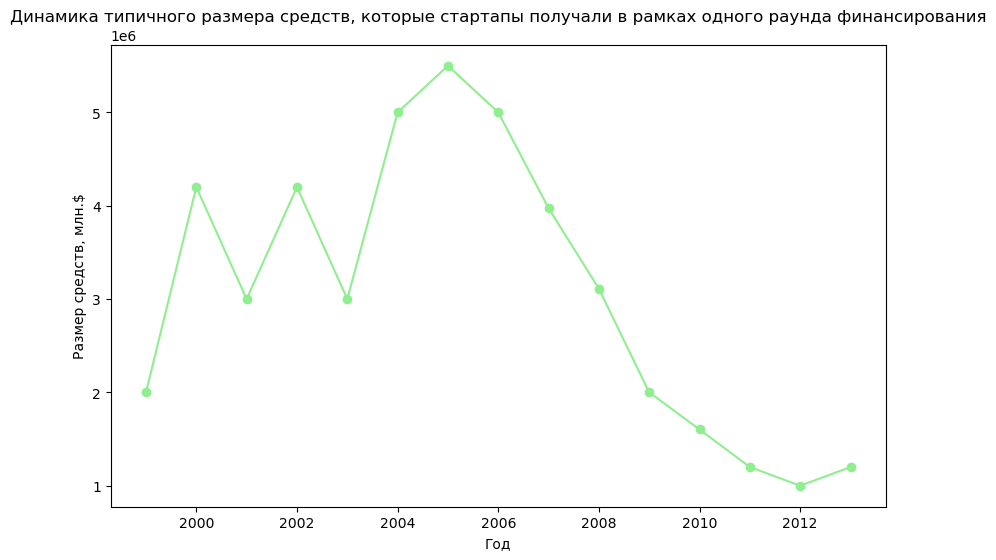

In [41]:
pivot['raised_amount'].loc[pivot['funding_rounds']>50].plot(kind='line', 
                                                            figsize=(10,6), 
                                                            color='lightgreen', 
                                                            marker='o'
)
plt.title('Динамика типичного размера средств, которые стартапы получали в рамках одного раунда финансирования')
plt.xlabel('Год')
plt.ylabel('Размер средств, млн.$')
plt.show()

###### Выводы
- В каком году типичный размер собранных в рамках одного раунда средств был максимален?
<br> В 2005 году был получен максимальный типичный размер собранных средств - 5.5 млн.$
- Какая тенденция по количеству раундов и выделяемых в рамках каждого раунда средств наблюдалась в 2013 году?
<br> В 2013 году было проведено 11042 раундов при 1200000 выделяемых средств. По сравнению с предыдущим годом количество раундов увеличилось на ~10%, количество средств увеличилось на ~16.7% 


### Люди и их образование

Заказчик хочет понять, зависит ли полнота сведений о сотрудниках (например, об их образовании) от размера компаний.

- Оцените, насколько информация об образовании сотрудников полна. Используя датасеты `people.csv` и `education.csv`, разделите все компании на несколько групп по количеству сотрудников и оцените среднюю долю сотрудников без информации об образовании в каждой из групп. Обоснуйте выбранные границы групп.
- Оцените, возможно ли для выполнения задания присоединить к этим таблицам ещё и таблицу `degrees.csv`.

In [43]:
education=education.rename(columns={'id': 'id_education' })
df=pd.merge(people, education, how='left', left_on='id', right_on='person_id')
df = df.drop('person_id', axis=1)
df

,id,first_name,last_name,company_id,network_username,id_education,institution,graduated_at
0,10,Mark,Zuckerberg,5.0,NaN,2415.0,Harvard University,NaT
1,100,Peter,Lester,27.0,NaN,NaN,NaN,NaT
2,1000,Dr. Steven,E. Saunders,292.0,NaN,NaN,NaN,NaT
3,10000,Neil,Capel,2526.0,NaN,NaN,NaN,NaT
4,100000,Sue,Pilsch,NaN,NaN,NaN,NaN,NaT
...,...,...,...,...,...,...,...,...
267689,99999,Ramon,Peypoch,NaN,NaN,NaN,NaN,NaT
267690,174088,Dr. Ray,Woods,188200.0,network,25958.0,Sydney University Medical School,1982-01-01
267691,118386,Ricardo,Durand,143419.0,itechsocialnet,18871.0,ESCS,2004-01-01
267692,175827,mahesh,kumar,NaN,socialnethubs,NaN,NaN,NaT


In [45]:
df=df.merge(df.groupby('company_id')['id'].count(), on='company_id', how='left')
df=df.rename(columns={'id_x': 'id', 'id_y':'count' })
df

,id,first_name,last_name,company_id,network_username,id_education,institution,graduated_at,count
0,10,Mark,Zuckerberg,5.0,NaN,2415.0,Harvard University,NaT,84.0
1,100,Peter,Lester,27.0,NaN,NaN,NaN,NaT,14.0
2,1000,Dr. Steven,E. Saunders,292.0,NaN,NaN,NaN,NaT,3.0
3,10000,Neil,Capel,2526.0,NaN,NaN,NaN,NaT,2.0
4,100000,Sue,Pilsch,NaN,NaN,NaN,NaN,NaT,NaN
...,...,...,...,...,...,...,...,...,...
267689,99999,Ramon,Peypoch,NaN,NaN,NaN,NaN,NaT,NaN
267690,174088,Dr. Ray,Woods,188200.0,network,25958.0,Sydney University Medical School,1982-01-01,1.0
267691,118386,Ricardo,Durand,143419.0,itechsocialnet,18871.0,ESCS,2004-01-01,1.0
267692,175827,mahesh,kumar,NaN,socialnethubs,NaN,NaN,NaT,NaN


In [47]:
df['count']

0         84.0
1         14.0
2          3.0
3          2.0
4          NaN
          ... 
267689     NaN
267690     1.0
267691     1.0
267692     NaN
267693     NaN
Name: count, Length: 267694, dtype: float64

In [49]:
bins   = [0, 1, 2, 3, 5, 10, 25, float('inf')]
labels = ['1', '2', '3', '4-5', '6-10', '11-25', '26+']
df['group']=pd.cut(df['count'], bins=bins, labels=labels)
df

,id,first_name,last_name,company_id,network_username,id_education,institution,graduated_at,count,group
0,10,Mark,Zuckerberg,5.0,NaN,2415.0,Harvard University,NaT,84.0,26+
1,100,Peter,Lester,27.0,NaN,NaN,NaN,NaT,14.0,11-25
2,1000,Dr. Steven,E. Saunders,292.0,NaN,NaN,NaN,NaT,3.0,3
3,10000,Neil,Capel,2526.0,NaN,NaN,NaN,NaT,2.0,2
4,100000,Sue,Pilsch,NaN,NaN,NaN,NaN,NaT,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
267689,99999,Ramon,Peypoch,NaN,NaN,NaN,NaN,NaT,NaN,NaN
267690,174088,Dr. Ray,Woods,188200.0,network,25958.0,Sydney University Medical School,1982-01-01,1.0,1
267691,118386,Ricardo,Durand,143419.0,itechsocialnet,18871.0,ESCS,2004-01-01,1.0,1
267692,175827,mahesh,kumar,NaN,socialnethubs,NaN,NaN,NaT,NaN,NaN


In [51]:
df=df.groupby('group',observed=True).agg({'id':'count', 'id_education':'count'})
df['part']=(df['id_education']/df['id']).round(2)
df

,id,id_education,part
group,,,
1,14150,5769,0.41
2,9470,7324,0.77
3,5571,4304,0.77
4-5,5559,4019,0.72
6-10,4885,3344,0.68
11-25,2832,1997,0.71
26+,2322,1881,0.81


###### Выводы
- Заказчик хочет понять, зависит ли полнота сведений о сотрудниках (например, об их образовании) от размера компаний
<br> По представленным данным видно, что чем больше компания, тем выше доля сведений об образовании сотрудников

### Объединять или не объединять — вот в чём вопрос

Некоторые названия столбцов встречаются в датасетах чаще других. В результате предварительной проверки датасетов было выяснено, что столбец `company_id` подходит для объединения данных.

- Установите, подходит ли для объединения данных столбец `network_username`, который встречается в нескольких датасетах. Нам необходимо понимать, дублируется ли для разных датасетов информация в столбцах с таким названием, и если да — то насколько часто.
- Оцените, можно ли использовать столбцы с именем `network_username` для объединения данных.

###### Выводы
- Оцените, можно ли использовать столбцы с именем network_username для объединения данных.
<br> Для объединения нельзя использовать данный столбец, так как в разных датасетах он содержит разную информацию. В одном датасете в нем информация о компании, а в другом о конкретном человеке.

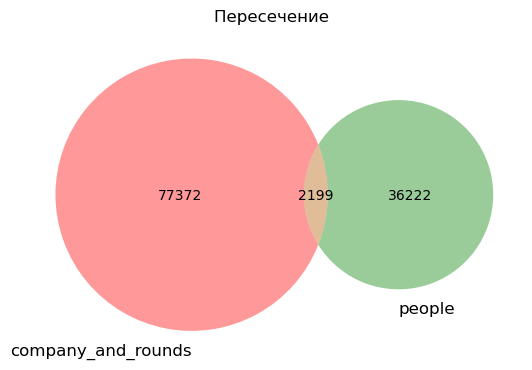

In [53]:
first_id = set(company_and_rounds['network_username'].dropna().unique())
second_id = set(people['network_username'].dropna().unique())
third_id = set(fund['network_username'].dropna().unique())
# Строим диаграмму Венна
venn2([first_id, second_id], set_labels=('company_and_rounds', 'people'))

# Отображаем график
plt.title("Пересечение ")
plt.show() 

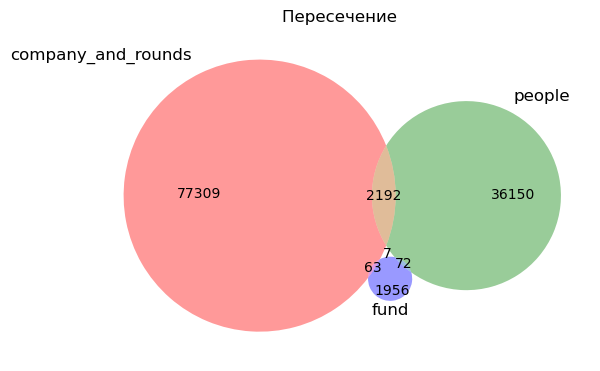

In [55]:
venn3([first_id, second_id, third_id], set_labels=('company_and_rounds', 'people', 'fund'))
plt.title("Пересечение ")
plt.show() 

###### Выводы
- Оцените, можно ли использовать столбцы с именем network_username для объединения данных.
<br> При пересечении видно, что маленькое количество данных присутствует в обоих датасетах. Поэтому нельзя использовать network_username для объединения.


### Проблемный датасет и причина возникновения пропусков

Во время собственного анализа данных у заказчика больше всего вопросов возникло к датасету `company_and_rounds.csv`. В нём много пропусков как раз в информации о раундах, которая заказчику важна.

- Любым удобным способом приведите данные в вид, который позволит в дальнейшем проводить анализ в разрезе отдельных компаний. Обратите внимание на структуру датасета, порядок и названия столбцов, проанализируйте значения.

По гипотезе заказчика данные по компаниям из этой таблицы раньше хранились иначе, более удобным для исследования образом.

- Максимальным образом сохраняя данные, сохранив их связность и исключив возможные возникающие при этом ошибки, подготовьте данные так, чтобы удобно было отобрать компании по параметрам и рассчитать показатели из расчёта на одну компанию без промежуточных агрегаций.

In [57]:
company=company_and_rounds.iloc[:, 0:12]
company.columns=company.columns.str.lower()
company

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0
3,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,0.0,0.0
4,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
217769,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
217770,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
217771,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
217772,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
company

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0
3,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,0.0,0.0
4,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
217769,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
217770,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
217771,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
217772,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
rounds=company_and_rounds.iloc[:,13:22]
rounds

,funding_round_id,company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round
0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,False,True
1,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,False,False
2,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,True,False
3,NaN,NaN,NaT,NaN,NaN,NaN,NaN,<NA>,<NA>
4,NaN,NaN,NaT,NaN,NaN,NaN,NaN,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...
217769,56454.0,282847.0,2011-01-31,other,5500000.0,0.0,0.0,True,True
217770,56542.0,55477.0,2011-01-13,venture,10633300.0,0.0,0.0,False,True
217771,56543.0,55477.0,2012-05-31,venture,2125720.0,0.0,0.0,True,False
217772,56928.0,283492.0,2013-12-03,venture,3602480.0,0.0,5.0,True,True


In [63]:
#количество явных дубликатов company
company.duplicated().sum()

21220

In [65]:
company = company.drop_duplicates().reset_index(drop=True)

In [67]:
#количество явных дубликатов company после удаления
company.duplicated().sum()

0

In [69]:
#количество явных дубликатов rounds 
rounds.duplicated().sum()

164845

In [71]:
rounds=rounds.drop_duplicates(subset=['company_id'], keep='last').reset_index(drop=True)

In [73]:
#количество явных дубликатов rounds после удаления
rounds.duplicated().sum()

0

In [75]:
rounds

,funding_round_id,company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round
0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,True,False
1,1644.0,1001.0,2008-02-26,series-a,5000000.0,0.0,3.0,True,True
2,6682.0,10014.0,2008-09-01,angel,0.0,0.0,1.0,True,True
3,54006.0,10015.0,2012-01-01,venture,2069200.0,0.0,4.0,False,False
4,55817.0,100155.0,2011-03-08,other,375293.0,0.0,0.0,False,True
...,...,...,...,...,...,...,...,...,...
31935,56184.0,146919.0,2013-11-06,other,4900000.0,0.0,0.0,True,True
31936,56454.0,282847.0,2011-01-31,other,5500000.0,0.0,0.0,True,True
31937,56543.0,55477.0,2012-05-31,venture,2125720.0,0.0,0.0,True,False
31938,56928.0,283492.0,2013-12-03,venture,3602480.0,0.0,5.0,True,True



## Шаг 3. Исследовательский анализ объединённых таблиц



### Объединение данных

Объедините данные для ответа на вопросы заказчика, которые касаются интересующих его компаний. Заказчика прежде всего интересуют те компании, которые меняли или готовы менять владельцев. Получение инвестиций или финансирования, по мнению заказчика, означает интерес к покупке или продаже компании.

В качестве основы для объединённой таблицы возьмите данные из обработанного датасета `company_and_rounds.csv` — выберите только те компании, у которых указаны значения `funding_rounds` или `investment_rounds` больше нуля, или те, у которых в колонке `status` указано `acquired`. В результирующей таблице должно получиться порядка 40 тысяч компаний.

Проверьте полноту и корректность получившейся таблицы. Далее работайте только с этими данными.

In [77]:
df=company.loc[((company['funding_rounds'] > 0)|(company['investment_rounds'] > 0))|(company['status']=='acquired')].reset_index()
df

,index,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total
0,0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0
1,1,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,0.0,0.0
2,2,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,0.0,0.0
3,13,1001.0,FriendFeed,web,acquired,2007-10-01,NaT,friendfeed.com,friendfeed,USA,0.0,1.0,5000000.0
4,18,10014.0,Mobclix,mobile,acquired,2008-03-01,NaT,mobclix.com,mobclix,USA,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40742,196544,1344.0,Vobile,web,operating,2005-01-01,NaT,vobileinc.com,networkmobile,USA,0.0,1.0,10000000.0
40743,196545,142181.0,Stop Being Watched,software,operating,2010-06-10,NaT,stopbeingwatched.com,SBWinfonetwork,USA,0.0,1.0,500000.0
40744,196549,3429.0,Zend Technologies,software,operating,1999-01-01,NaT,zend.com,networkzend,USA,0.0,4.0,44000000.0
40745,196550,7748.0,Flowgram,web,closed,2007-06-01,2008-06-11,flowgram.com,network,USA,0.0,1.0,1300000.0



### Анализ выбросов

Заказчика интересует обычный для рассматриваемого периода размер средств, который предоставлялся компаниям.

- По предобработанному столбцу `funding_total` графическим способом оцените, какой размер общего финансирования для одной компании будет типичным, а какой — выбивающимся.
- В процессе расчёта значений обратите внимание, например, на показатели, возвращаемые методом `.describe()`, — объясните их. Применимы ли к таким данным обычные способы нахождения типичных значений?

In [79]:
df['funding_total'].describe()

count    4.074700e+04
mean     1.013561e+07
std      5.646436e+07
min      0.000000e+00
25%      0.000000e+00
50%      6.000000e+05
75%      5.650650e+06
max      5.700000e+09
Name: funding_total, dtype: float64

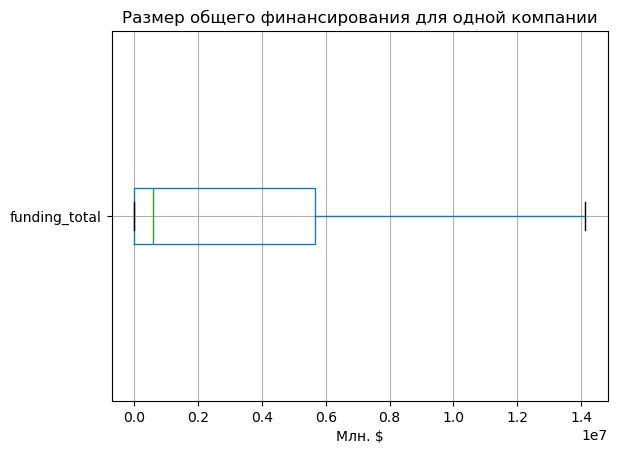

In [81]:
boxplot = df.boxplot(column='funding_total',
                     vert=False,
                     showfliers=False)

# Добавляем заголовок и метку оси X
boxplot.set_title('Размер общего финансирования для одной компании')
boxplot.set_xlabel('Млн. $')

plt.show()

###### Выводы
<br> В данных содержится много выбросов. Среднее значение составляет 12988100, медианное 1700000. 
<br> Так как среднее значение больше медианы, то распределение положительно искажено (есть выбросы в сторону больших значений)
<br> 25% составляет 200000, 75% - 9023305

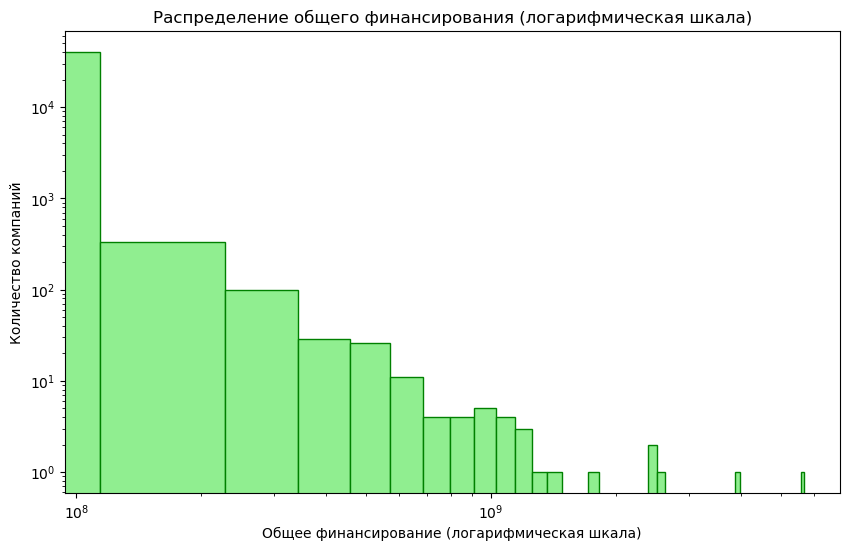

In [83]:
plt.figure(figsize=(10, 6))
plt.hist(df['funding_total'], bins=50, color='lightgreen', edgecolor='green', log=True)
plt.xscale('log')  # Логарифмическая шкала по оси X
plt.xlabel('Общее финансирование (логарифмическая шкала)')
plt.ylabel('Количество компаний')
plt.title('Распределение общего финансирования (логарифмическая шкала)')
plt.show()


### Куплены забесплатно?

- Исследуйте компании, которые были проданы за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансирования.

- Рассчитайте аналитически верхнюю и нижнюю границу выбросов для столбца `funding_total` и укажите, каким процентилям границы соответствуют.

###### Выводы
<br> В данных есть инфформация о компаниях, купленных за бесплатно. Большинство таких компаний продано за 1 раунд

In [85]:
df_merge=pd.merge(df, acquisition, left_on='company_id', right_on='acquired_company_id', how='left' )
df_merge.loc[(df_merge.status == "acquired") & (df_merge.price_amount < 2) & (df_merge.funding_total != 0)].reset_index()

,level_0,index,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,25,66,10054.0,Jumptap,mobile,acquired,2005-01-01,NaT,jumptap.com,jumptap,USA,0.0,7.0,121500000.0,9288.0,23283.0,10054.0,cash_and_stock,0.0,2013-08-13
1,63,170,101312.0,SideTour,web,acquired,2011-06-01,NaT,sidetour.com,sidetour,USA,0.0,3.0,4000000.0,9653.0,11391.0,101312.0,NaN,0.0,2013-09-18
2,66,177,101340.0,ChoicePass,enterprise,acquired,2011-07-01,NaT,choicepass.com,choicepass,USA,0.0,1.0,250000.0,7272.0,1972.0,101340.0,NaN,0.0,2012-06-18
3,67,181,10137.0,Producteev,software,acquired,2008-07-08,NaT,producteev.com,producteev,USA,0.0,3.0,1310000.0,8254.0,757.0,10137.0,cash_and_stock,0.0,2012-11-05
4,68,184,10139.0,TradeCard,enterprise,acquired,1999-01-01,NaT,tradecard.com,TradeCard,USA,0.0,2.0,44925000.0,9326.0,44008.0,10139.0,NaN,0.0,2013-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1613,40834,196260,99.0,Amie Street,web,acquired,2011-07-04,NaT,amiestreet.com,amiestreet_logs,USA,0.0,2.0,3900000.0,7024.0,317.0,99.0,NaN,0.0,2010-09-22
1614,40836,196269,9905.0,UBmatrix,software,acquired,2005-01-01,NaT,ubmatrix.com,NaN,USA,0.0,2.0,5172350.0,3381.0,41119.0,9905.0,NaN,0.0,2010-06-24
1615,40840,196288,992.0,wunderloop,advertising,acquired,1999-01-01,NaT,wunderloop.com,NaN,USA,0.0,1.0,10000000.0,9916.0,19182.0,992.0,NaN,0.0,2010-07-02
1616,40854,196346,997.0,Zimbra,enterprise,acquired,2003-01-01,NaT,zimbra.com,zimbra,USA,0.0,1.0,14500000.0,9121.0,415.0,997.0,NaN,0.0,2013-07-15


In [87]:
df_merge

,index,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,NaN,NaN,NaN,NaN,NaN,NaT
1,1,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,0.0,0.0,1.0,11.0,10.0,NaN,2.000000e+07,2007-05-30
2,2,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,0.0,0.0,20.0,377.0,100.0,cash,0.000000e+00,2005-05-29
3,13,1001.0,FriendFeed,web,acquired,2007-10-01,NaT,friendfeed.com,friendfeed,USA,0.0,1.0,5000000.0,1901.0,5.0,1001.0,cash_and_stock,4.750000e+07,2009-08-10
4,18,10014.0,Mobclix,mobile,acquired,2008-03-01,NaT,mobclix.com,mobclix,USA,0.0,1.0,0.0,3878.0,23054.0,10014.0,NaN,0.000000e+00,2010-09-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40885,196544,1344.0,Vobile,web,operating,2005-01-01,NaT,vobileinc.com,networkmobile,USA,0.0,1.0,10000000.0,NaN,NaN,NaN,NaN,NaN,NaT
40886,196545,142181.0,Stop Being Watched,software,operating,2010-06-10,NaT,stopbeingwatched.com,SBWinfonetwork,USA,0.0,1.0,500000.0,NaN,NaN,NaN,NaN,NaN,NaT
40887,196549,3429.0,Zend Technologies,software,operating,1999-01-01,NaT,zend.com,networkzend,USA,0.0,4.0,44000000.0,NaN,NaN,NaN,NaN,NaN,NaT
40888,196550,7748.0,Flowgram,web,closed,2007-06-01,2008-06-11,flowgram.com,network,USA,0.0,1.0,1300000.0,NaN,NaN,NaN,NaN,NaN,NaT


In [89]:
df_merge['funding_total'].describe()

count    4.089000e+04
mean     1.013559e+07
std      5.641289e+07
min      0.000000e+00
25%      0.000000e+00
50%      6.000000e+05
75%      5.631320e+06
max      5.700000e+09
Name: funding_total, dtype: float64

In [91]:
# Вычисляем квартили Q1 и Q3
Q1 = df_merge['funding_total'].quantile(0.25)
Q3 = df_merge['funding_total'].quantile(0.75)

# Вычисляем межквартильный размах IQR
IQR = Q3 - Q1

# Определяем верхний порог для выбросов
upper_bound = Q3 + 1.5 * IQR
lower_bound= Q1 - 1.5 * IQR

print(f'Верхний порог выбросов: {upper_bound}')
print(f'Нижний порог выбросов: {lower_bound}')

Верхний порог выбросов: 14078300.0
Нижний порог выбросов: -8446980.0


###### Выводы
<br> Приведены пороги выбросов по funding_total. Нижний порог получился отрицательный, так как 25 процентиль равен нулю.


### Цены стартапов по категориям

Категории стартапов с типично высокими ценами покупки стартапов и значительным разбросом цен могут быть привлекательными для крупных инвесторов, которые готовы к высоким рискам ради потенциально больших доходов. Среди категорий стартапов выделите категории стартапов, характеризующиеся:

- типично высокими ценами;
- и наибольшим разбросом цен за стартап.

Объясните, почему решили составить топ именно из такого числа категорий и почему рассчитывали именно так.

In [93]:
df_merge=df_merge.loc[(df_merge.price_amount >0)].reset_index()

In [95]:
Q1 = df_merge['price_amount'].quantile(0.25)
Q3 = df_merge['price_amount'].quantile(0.75)

# Вычисляем межквартильный размах IQR
IQR = Q3 - Q1

# Определяем верхний порог для выбросов
upper_bound = Q3 + 1.5 * IQR

print(f'Верхний порог выбросов: {upper_bound}')

Верхний порог выбросов: 643450000.0


In [97]:
df_merge=df_merge.loc[(df_merge.price_amount < upper_bound)]
df_merge

,level_0,index,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,1,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,0.0,0.0,1.0,11.0,10.0,NaN,20000000.0,2007-05-30
1,3,13,1001.0,FriendFeed,web,acquired,2007-10-01,NaT,friendfeed.com,friendfeed,USA,0.0,1.0,5000000.0,1901.0,5.0,1001.0,cash_and_stock,47500000.0,2009-08-10
2,32,81,1007.0,Rupture,games_video,acquired,NaT,NaT,rupture.com,rupture,USA,0.0,1.0,3000000.0,2186.0,851.0,1007.0,cash,15000000.0,2008-05-08
3,77,210,101519.0,Vidacare,hardware,acquired,NaT,NaT,vidacare.com,NaN,USA,0.0,1.0,274999.0,10214.0,65984.0,101519.0,NaN,262500000.0,2013-10-29
4,83,221,10158.0,StudioNow,photo_video,acquired,2007-01-01,NaT,studionow.com,NaN,USA,0.0,3.0,15286400.0,2923.0,351.0,10158.0,cash_and_stock,36500000.0,2010-01-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2467,40831,196246,9894.0,EyeWonder,advertising,acquired,1999-01-01,NaT,eyewonder.com,NaN,USA,0.0,0.0,0.0,6079.0,26466.0,9894.0,cash,66000000.0,2011-08-30
2468,40848,196323,9949.0,PPTV,games_video,acquired,2004-01-01,NaT,pptv.com,NaN,CHN,0.0,4.0,286500000.0,9692.0,267149.0,9949.0,NaN,400000000.0,2013-09-25
2469,40852,196345,99685.0,Symbyo Dental,biotech,acquired,2009-06-01,NaT,symbyodental.com,NaN,NaN,0.0,1.0,500000.0,7240.0,161312.0,99685.0,stock,4800000.0,2011-08-01
2470,40853,196346,997.0,Zimbra,enterprise,acquired,2003-01-01,NaT,zimbra.com,zimbra,USA,0.0,1.0,14500000.0,85.0,29.0,997.0,cash,350000000.0,2007-09-01


In [99]:
df_merge['price_amount'].describe()

count    2.187000e+03
mean     1.084869e+08
std      1.448383e+08
min      1.000000e+00
25%      1.000000e+07
50%      4.000000e+07
75%      1.500000e+08
max      6.430000e+08
Name: price_amount, dtype: float64

In [101]:
df_new=df_merge.groupby('category_code',observed=True)['price_amount'].agg({'median','count','std'}).round(2).reset_index()
df_new

,category_code,median,std,count
0,advertising,47500000.0,1.378529e+08,74
1,analytics,200000000.0,9.296774e+07,3
2,automotive,43000000.0,NaN,1
3,biotech,105000000.0,1.884804e+08,216
4,cleantech,162500000.0,1.444089e+08,34
5,consulting,26250000.0,1.106711e+08,29
6,ecommerce,105000000.0,1.800376e+08,46
7,education,10000000.0,1.746954e+07,5
8,enterprise,41150000.0,1.235170e+08,94
9,fashion,195000000.0,8.649422e+07,3


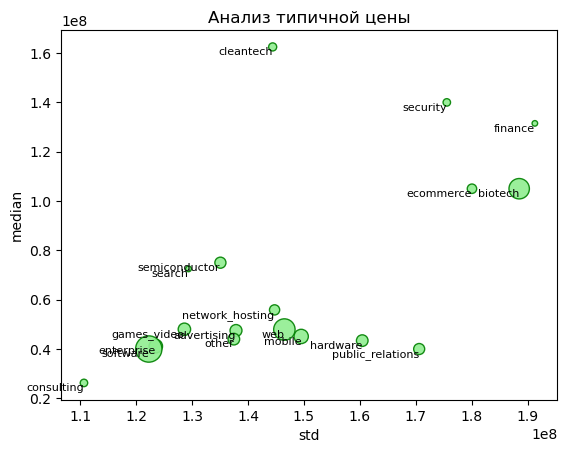

In [103]:

df_new.loc[df_new['count']>15].plot(
    kind='scatter',      # Определяет, что тип графика — scatterplot
    x='std',  # Данные по оси X
    y='median',  # Данные по оси Y
    alpha=0.9,           # Прозрачность точек
    color='lightgreen',        # Цвет точек
    edgecolor='green',   # Цвет контура точек
    s='count',                # Размер точек
    title='Анализ типичной цены') # Заголовок графика

x = df_new.loc[df_new['count']>15]['std'].values
y = df_new.loc[df_new['count']>15]['median'].values
types = df_new.loc[df_new['count']>15]['category_code'].values
for i in range(len(x)): 
    plt.text(x[i], y[i], types[i], fontsize=8, ha='right', va='top')
plt.show()


### Сколько раундов продержится стартап перед покупкой

- Необходимо проанализировать столбец `funding_rounds`. Исследуйте значения столбца. Заказчика интересует типичное значение количества раундов для каждого возможного статуса стартапа.
- Постройте график, который отображает, сколько в среднем раундов финансирования проходило для стартапов из каждой группы. Сделайте выводы.

In [105]:
df.groupby('status',observed=True)['funding_rounds'].mean().round(2)

status
acquired     0.52
closed       1.38
ipo          1.93
operating    1.52
Name: funding_rounds, dtype: float64

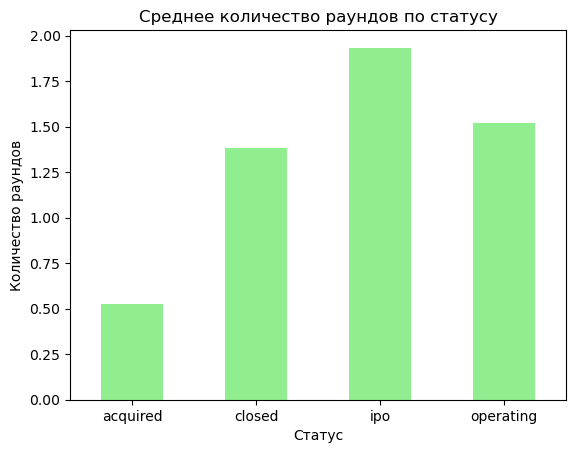

In [107]:
df.groupby('status',observed=True)['funding_rounds'].mean().plot(kind='bar',
                                color='lightgreen',
                                legend=False)
plt.title('Среднее количество раундов по статусу')
plt.ylabel('Количество раундов')
plt.xlabel('Статус')
plt.xticks(rotation=0)
plt.show()


## Шаг 4. Итоговый вывод и рекомендации

Опишите, что было сделано в проекте, какие были сделаны выводы, подкрепляют ли они друг друга или заставляют сомневаться в полученных результатах.
- Загружены и изучены данные.
- Объединены в один датафрейм два файла для получения информации об образовании.
- Проведен анализ и предобработка данных. Скорректированы типы данных. Изменены названия столбцов и исправлены опечатки в названии. В некоторых столбцах пропуски заменены на пустые строки.  
- Проанализировваны раунды финансирования по годам, для этого добавлен новый столбец с годом.
- Датасет company_and_rounds разделен на два, для приведения данных так, чтобы удобно было отобрать компании по параметрам и рассчитать показатели из расчёта на одну компанию без промежуточных агрегаций.
- Проанализированы выбросы в столбце funding_total нового датасета
- Обнаружены покупки за бесплатно
- Проанализировано типичное количество раундов. Самое большое среднее значение у компаний, которые в статусе IPO